In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
print(df_umsatz.head())

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754


In [ ]:
df_kiwo = pd.read_csv("kiwo.csv")
print(df_kiwo.head())

        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1


In [ ]:
df_wetter = pd.read_csv("wetter.csv")
print(df_wetter.head())

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0


In [ ]:
df_umsatz_kiwo_wetter = df_umsatz.merge(df_kiwo, on='Datum').merge(df_wetter, on='Datum')
print(df_umsatz_kiwo_wetter.head())


        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2014-06-21            1  162.410673            1         6.0     15.5125   
1  2014-06-22            1   99.627613            1         5.0     15.7000   
2  2014-06-23            1  130.997405            1         4.0     16.5000   
3  2014-06-24            1  119.068456            1         7.0     14.3625   
4  2014-06-25            1  114.248640            1         0.0     18.4375   

   Windgeschwindigkeit  Wettercode  
0                   18        61.0  
1                   19         NaN  
2                   17         NaN  
3                    7        21.0  
4                   10         NaN  


In [ ]:
df_umsatz_kiwo_wetter.describe()

,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,165.000000
mean,2.991031,260.559219,1.0,4.910314,18.418161,11.515695,48.575758
std,1.420541,177.014984,0.0,2.066688,3.266123,3.986291,30.539888
min,1.000000,46.452105,1.0,0.000000,11.562500,5.000000,0.000000
25%,2.000000,127.937248,1.0,4.000000,16.500000,8.000000,21.000000
50%,3.000000,213.304835,1.0,5.000000,18.000000,10.000000,61.000000
75%,4.000000,368.270772,1.0,7.000000,20.125000,14.000000,61.000000
max,5.000000,861.858617,1.0,8.000000,27.875000,20.000000,95.000000


In [ ]:
df_umsatz_kiwo_wetter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                223 non-null    object 
 1   Warengruppe          223 non-null    int64  
 2   Umsatz               223 non-null    float64
 3   KielerWoche          223 non-null    int64  
 4   Bewoelkung           223 non-null    float64
 5   Temperatur           223 non-null    float64
 6   Windgeschwindigkeit  223 non-null    int64  
 7   Wettercode           165 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 14.1+ KB


In [ ]:
df_umsatz_kiwo_wetter.isnull()
# die Wettercodes 1, 2 und 4 enthalten NaN-Werte (Not a Number-Werte)

,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False
219,False,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False,False
221,False,False,False,False,False,False,False,False


/tmp/ipykernel_6231/1708249568.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


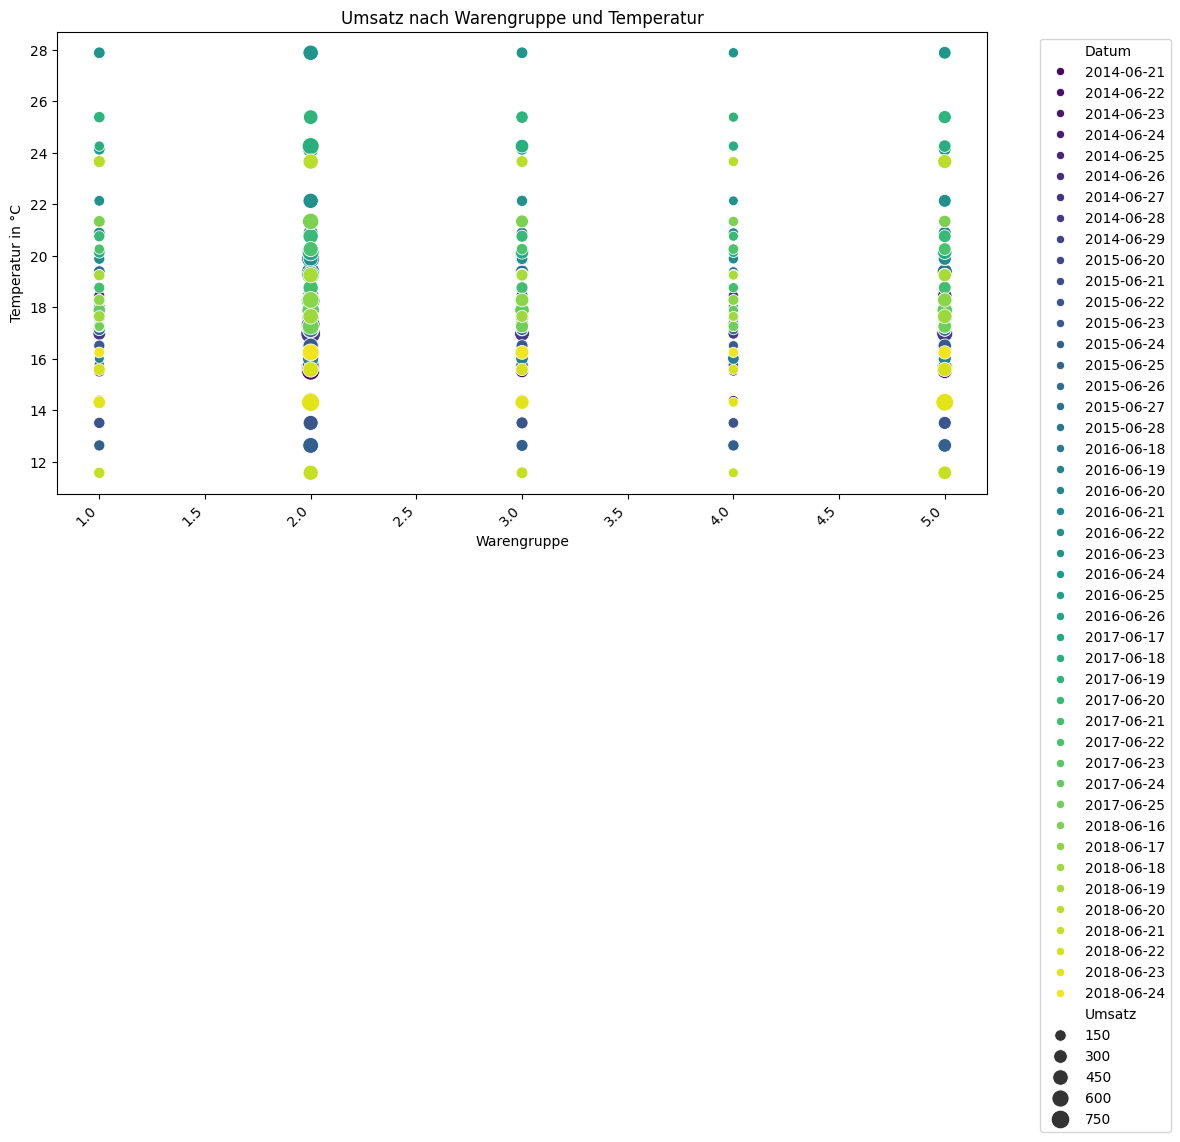

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grundlegender Plot mit angepassten Parametern
plt.figure(figsize=(12, 6))  # Größere Darstellung
sns.scatterplot(data=df_umsatz_kiwo_wetter, 
                x='Warengruppe',
                y='Temperatur',
                size='Umsatz',       # Größe basierend auf Umsatz
                sizes=(50, 200),     # Min und Max Größe der Punkte
                hue='Datum',          # Färbung nach Kalenderwoche
                palette='viridis')   # Andere Farbpalette

# Setze die X-Achsen-Ticks auf ganze Zahlen
plt.xticks(range(min(df_umsatz_kiwo_wetter['Warengruppe']), 
                 max(df_umsatz_kiwo_wetter['Warengruppe']) + 1))

plt.title('Umsatz und Temperatur nach Warengruppen')
plt.xlabel('Warengruppe')
plt.ylabel('Umsatz in €')

# Legende anpassen
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Temperatur in °C')

# Layout optimieren
plt.tight_layout()

plt.show()